<a href="https://colab.research.google.com/github/TanoOliva/ADA-Informes/blob/main/SubArrayMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del Subarray máximo

El problema de subarray máximo es el método para encontrar el subarray contiguo dentro de una matriz unidimensional de números que tiene la suma más grande.

En el análisis de imágenes, cuando se trata de encontrar el área más brillante de una imagen, se ocupa este algoritmo. La imagen debe de ser un mapa de bits (archivos con extensión .bmp). La imagen se transforma en una matriz en la que cada valor equivale al brillo de cada pixel.

Ese es el uso más fácil de entender. Sin embargo no es el único, también en el análisis de las subsecuencias genómicas y en la minería de datos de utiliza este algoritmo. En el ejemplo que ves en esta página se utilizan valores positivos y negativos, en los usos de la vida real que ya te mostramos se utiliza otro rango de valores.





# 2. SubarrayMaximo


## 2.1 Codigo

In [75]:
import matplotlib.pyplot as plt
import time
from termcolor import colored
import numpy as np
import random
import math
 
# find max crossing subarray in linear time
def MaxSubArrayMid(A, low, mid, high):
    max_left, max_right = -1, -1
 
    #Parte izquierda del subarreglo
    left_sum = float("-Inf")
    sum = 0
    for i in range(mid, low - 1, -1):
        sum += A[i]
        if (sum > left_sum):
            left_sum = sum
            max_left = i
 
    # Parte derecha del Subarreglo
    right_sum = float("-Inf")
    sum = 0
    for j in range(mid + 1, high + 1):
        sum += A[j]
        if (sum > right_sum):
            right_sum = sum
            max_right = j
 
    return max_left, max_right, left_sum + right_sum
 

# time complexity: n*logn
def MaxSubArray(A, low, high,verbose = False):
    if (high == low):
        return low, high, A[low]
    else:
        mid = math.floor((low + high) / 2)
        left_low, left_high, left_sum = MaxSubArray(A, low, mid)
        if verbose == True:
          print("subarreglo 1: ",left_low, left_high, left_sum)
        right_low, right_high, right_sum = MaxSubArray(A, mid + 1, high)
        if verbose == True:
          print("subarreglo 2: ",right_low, right_high, right_sum)
        cross_low, cross_high, cross_sum = MaxSubArrayMid(A, low, mid, high)
        if verbose == True:
          print("subarreglo 3: ",cross_low, cross_high, cross_sum)
        if (left_sum >= right_sum and left_sum >= cross_sum):
            return left_low, left_high, left_sum
        elif (right_sum >= left_sum and right_sum >= cross_sum):
            return right_low, right_high, right_sum
        else:
            return cross_low, cross_high, cross_sum
 


# Kadane’s Algorithm
def maxSubArraySum(a, size):
    max_so_far = float("-inf")
    max_ending_here = 0
 
    for i in range(size):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
 
        if max_ending_here < 0:
            max_ending_here = 0
 
    return max_so_far

 
# ejemplos
A = [-2,-5,17,-2,9,-8,5,-6]
# A = [-2, 2, -3, 4, -1, 2, 1, -5, 3]
# A = [0,-2, 3, 5, -1, 2]
# A = [-9, -2, -3, -5, -3]
# A = [1, 2, 3, 4, 5]
# A = [-2, -3, 4, -1, -2, 1, 5, -3]

print('using divide and conquer...')
aindex,bindex,max = MaxSubArray(A, 0, len(A) - 1)
print("el indice del inicio  del sub arreglo es: ",aindex)
print("el indice del termino del sub arreglo es: ",bindex)
print("la suma del subarreglo es: ",max)

 

 


using divide and conquer...
el indice del inicio  del sub arreglo es:  2
el indice del termino del sub arreglo es:  4
la suma del subarreglo es:  24


## 2.2 Descripcion del algoritmo

El principio para la resolucion del problema consiste en el metodo divide y venceras.
Por lo que el problema se divide en subproblemas mas pequeños hasta llegar al caso base de manera recursiva.

En este caso del subarreglo maximo, la idea es encontrar el subarreglo mas grande dentro del arreglo A[low .... high], donde mid será la posicion central del arreglo.

Luego de encontrar la posicion central se resuelven los subarreglos A[low .... mid] y A[mid + 1 .... high]. Cualquier subconjunto continuo A[i .... j] de A[low .... high] debe ser una de las siguientes tres situaciones:

1. Está completamente en el subarreglo A[low....high], por lo que (low <= i <= j <= mid)
2. Está completamente ubicado en el subarreglo A[mid+....high], por lo que (mid <= i <= j <= high)
3. El punto medio está cruzado, por lo que (low <= i <= mid < j <= high)


por lo tanto el subarray maximo debe ser el mas grande de los tres casos anteriores, para el caso 1 y el caso 2, se pueden resolver de manera recursiva y todo lo que queda es encontrar la subarreglo mas grande que abarque el punto medio.
Cualquier subarreglo que cruza el punto medio se compone por dos subarreglos A[i ... mid] y A[mid+1 .... j], para encontrar la combinacion maxima dentro de estos dos subarreglos se hace de manera lineal recorriendo el arreglo.

##2.3 Ejemplo:

Comprobacion de que el agoritmo MaxSubArrayMid funciona: 

Entrada: array = [-9,8,-7,10,55,-1,7,-100]
Se espera que la suma maxima de 72 y que los indices sean: 1 y 6

In [56]:
array = [-9,8,-7,10,55,-1,7,-100]
aindex,bindex,max = MaxSubArray(array, 0, len(array) - 1)
print("el indice del inicio  del sub arreglo es: ",aindex)
print("el indice del termino del sub arreglo es: ",bindex)
print("la suma del subarreglo es: ",max)


el indice del inicio  del sub arreglo es:  1
el indice del termino del sub arreglo es:  6
la suma del subarreglo es:  72


# 3. Tiempo de Ejecucion

El algoritmo con el principio Divide y Venceras tiene un tiempo de ejecucion de O(n*log(n))

El algoritmo tiene una ecuacion de recurrencia correspondiente a: 

T(n) = 2T (n/2) + O(n)

Ya que hace 2 llamadas recursivas a la funcion de tamaño n/2

Al resolver la ecuacion de recurrencia nos da T(n) = n*log(n)





# 4. Correctitud



# 5. Experimentos



## 5.1 Graficos



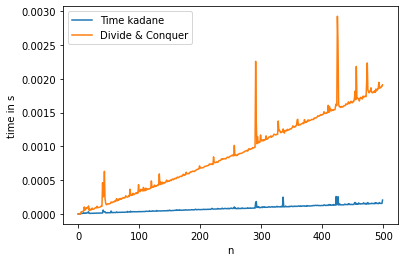

In [64]:
#retorna un arreglo con valores entre -20 y 20 de largo n
def randomArray(n):
  array = np.zeros(n)
  for i in range (len(array)):
    array[i] = int(random.randint(1,40) - 20)
  return array


z = np.zeros(500)
y = np.zeros(500)

x = [n for n in range(0,500)]
for i in range (5,500):
  array = randomArray(i)
  start = time.time()
  maxSumKanade = maxSubArraySum(array, len(array))
  end = time.time()
  y[i] = end - start

  start = time.time()
  a,b,c = MaxSubArray(array, 0, len(array) - 1)
  end = time.time()
  z[i] = end - start




plt.plot(x,y,z)
plt.legend(["Time kadane","Divide & Conquer",])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()
  








El algoritmo con el principio divide y venceras tiene una complejidad de O(n log(n)) y el algoritmo de kedane tiene una complejidad de O(n) ya que el numero de operaciones depende directamente con el tamaño del problema

## experimento 2

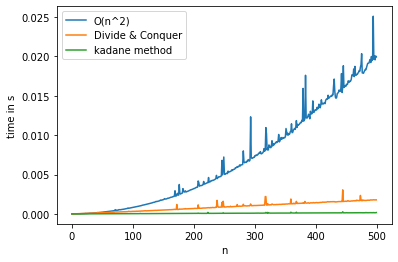

In [74]:
#retorna un arreglo con valores entre -20 y 20 de largo n
def randomArray(n):
  array = np.zeros(n)
  for i in range (len(array)):
    array[i] = int(random.randint(1,40) - 20)
  return array

def MaxSubArrayN2(array):
  max = array[0]
  for i in range(0,len(array)):
    suma = 0
    for j in range(i,len(array)):
      suma = suma + array[j]
      if suma>max:
        max = suma
  
  return max


z = np.zeros(500)
y = np.zeros(500)
w = np.zeros(500)
x = [n for n in range(0,500)]
for i in range (5,500):
  array = randomArray(i)
  start = time.time()
  max = MaxSubArrayN2(array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  a,b,c = MaxSubArray(array, 0, len(array) - 1)
  end = time.time()
  z[i] = end - start

  start = time.time()
  maxSumKadane = maxSubArraySum(array, len(array))
  end = time.time()
  w[i] = end - start


plt.plot(x,y,z)
plt.plot(x, w)
plt.legend(["O(n^2)","Divide & Conquer","kadane method"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()
  

Se puede apreciar en el grafico que el metodo recorriendo el arreglo completo y probando todas las combinaciones es el metodo mas ineficiente, sin embargo es interesante como la curva del metodo D&C en este grafico parece ser insignificante.

Comparando este grafico y el anterior el metodo D&C parecia un poco ineficiente, pero al graficar los 3 metodos uno puede apreciar la importancia de implementar un metodo eficiente y que utilice pocos recursos